Model Accuracy: 0.8917394669910428

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7993
           1       0.58      0.24      0.34      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



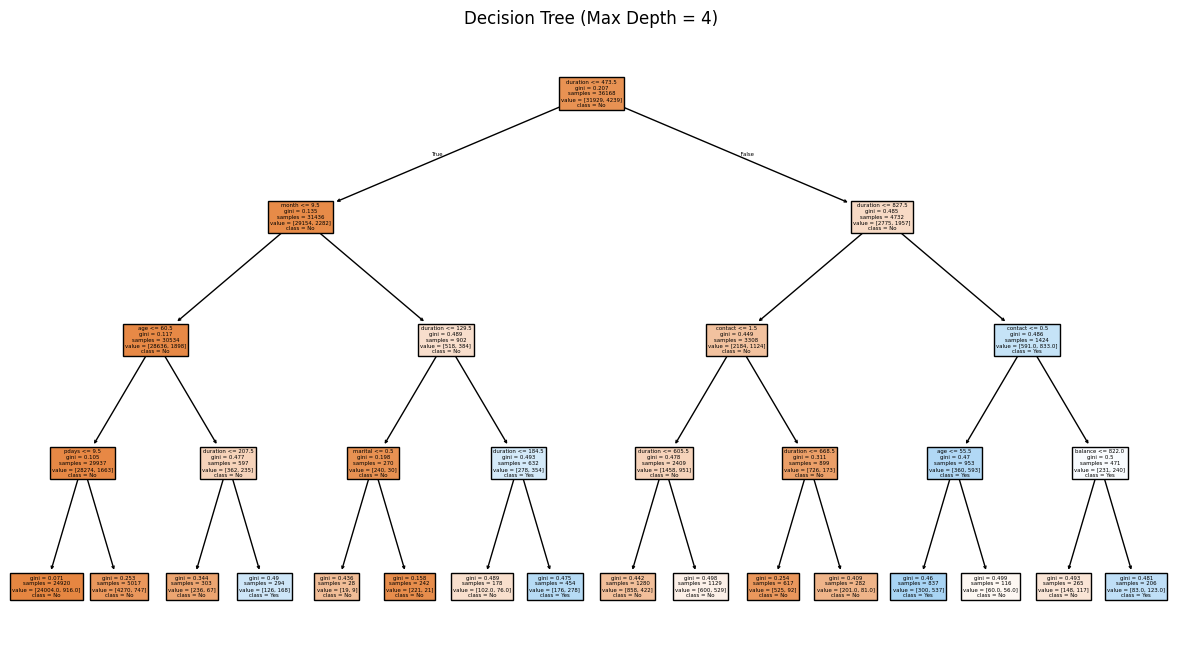

In [1]:
# bank_marketing_decision_tree.py

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data = pd.read_csv("/content/sample_data/bank-full.csv", sep=';')

# Step 2: Encode text columns into numbers
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Step 3: Prepare input (X) and output (y)
X = data.drop('y', axis=1)
y = data['y']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 5: Train the Decision Tree with max_depth = 4 (limit size)
model = DecisionTreeClassifier(max_depth=4, random_state=1)
model.fit(X_train, y_train)

# Step 6: Predict on test data
y_pred = model.predict(X_test)

# Step 7: Evaluate
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Plot and save decision tree
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Max Depth = 4)")
plt.savefig("decision_tree_plot.png")
plt.show()


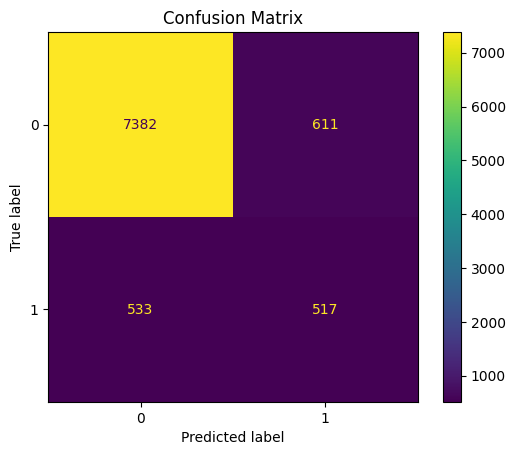

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [5]:
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=1)


In [6]:
import joblib
joblib.dump(model, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

✅ Accuracy: 0.8981532677208891

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7993
           1       0.60      0.38      0.47      1050

    accuracy                           0.90      9043
   macro avg       0.76      0.67      0.71      9043
weighted avg       0.88      0.90      0.89      9043



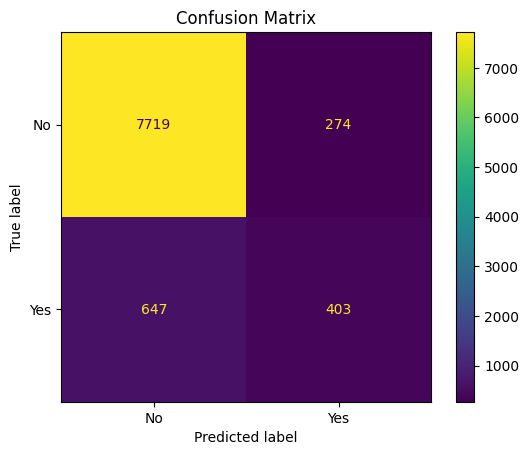

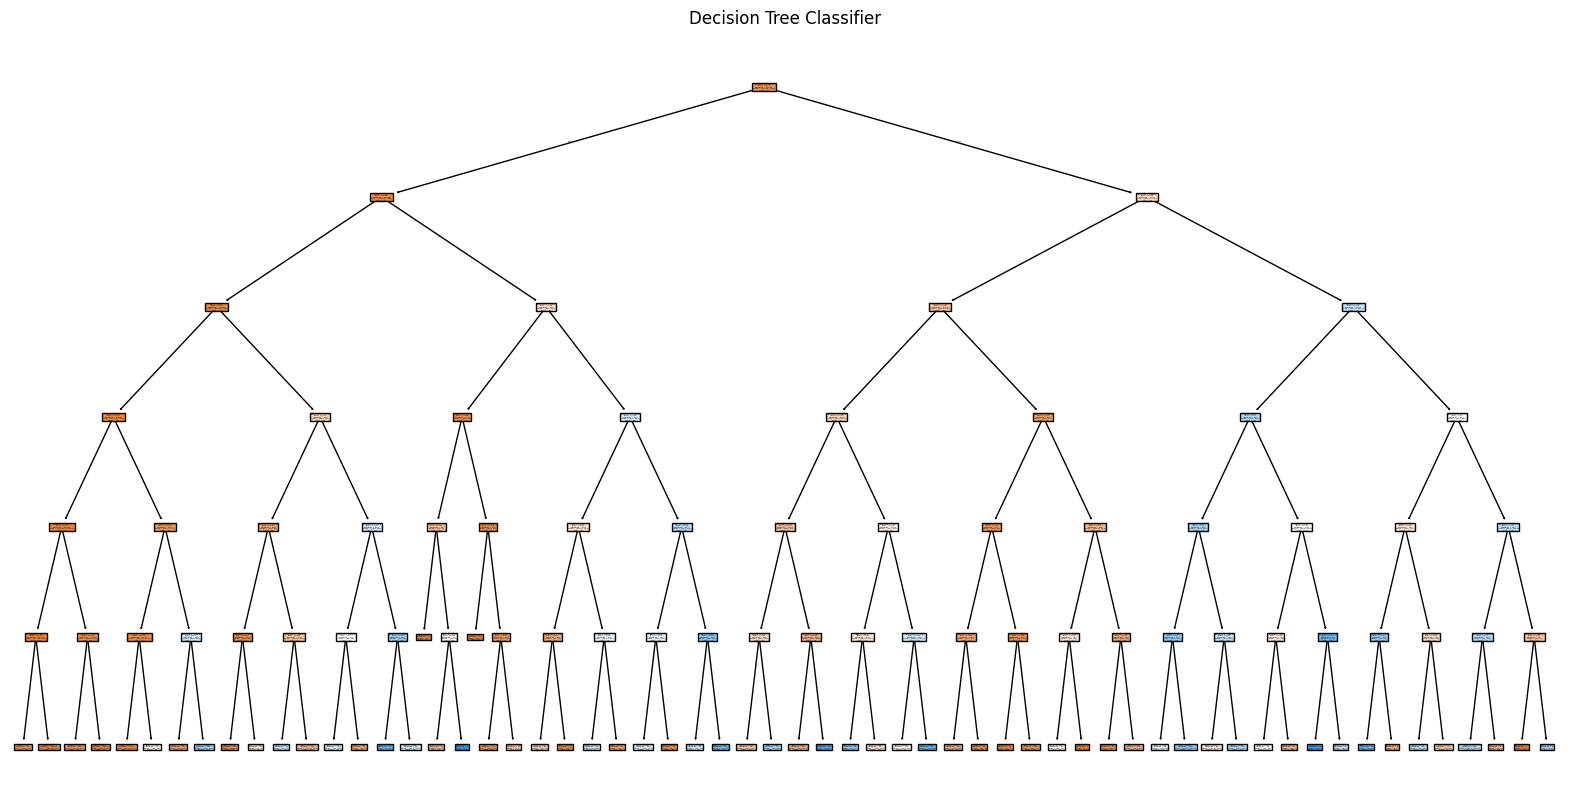

In [9]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load the dataset
data = pd.read_csv("/content/sample_data/bank-full.csv", sep=';')  # Separator is semicolon

# Step 3: Encode categorical columns into numbers
label_encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

# Step 4: Prepare input features (X) and target (y)
X = data.drop('y', axis=1)  # All columns except the target
y = data['y']               # Target column (0 = no, 1 = yes)

# Step 5: Split dataset into training and testing data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 6: Create the decision tree model
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=1)

# Step 7: Train the model on training data
model.fit(X_train, y_train)

# Step 8: Predict on the test data
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Step 11: Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Classifier")
plt.savefig("decision_tree_output.png")
plt.show()
